# Nicolas Aguilera 2127303-3146

Los modelos epidemiológicos SIR son de gran utilidad para el análisis de evolución de epidemias. Estos modelos consideran una población fija con tres tipos de individuos: susceptibles ($S$),infectados ($I$)y resistentes ($R$), razon por la cual son llamados modelos SIR. El sistema de   ecuaciones diferenciales que describe el sistema es 

\begin{eqnarray}
 \dfrac{d S}{dt} &=& - \dfrac{\beta S I}{N},\\
 \dfrac{d I}{dt} &=&  \dfrac{\beta S I}{N}- \gamma  I,\\
 \dfrac{d R}{dt} &=&  \gamma I ,
\end{eqnarray}

Donde $N$ es la población total, es decir $N= S+I+R$,  $\beta$ es la tasa de contagios  y  $\gamma$ es la tasa de recuperación por unidad de tiempo medido en días.

 
Con lo anterior y suponiendo que se tiene una epidemia con condiciones iniciales condiciones iniciales         $S_0 = 9990$, $I_0 =10$ $R_0 = 0$ y parámetros $\beta = 2.5 $, $ \gamma = 0.5$ :

- Resuelva el sistema y grafique las curvas de de evolución de las variables S, I y R.

- Segun la curva obtenida, estime cuando sera el "pico" de la epidemia, es decir; estime cuando se dara la mayor cantidad de contagios.

- Según las curvas obtenidas, cuando estaría  recuperada mas del el $90 \%$ de la población.

- Podría ajustar este modelo para modelar el comportamiento del corona virus? 


**Nota:** En este modelo no se consideran muertes ni nacimientos, la población es fija.

In [3]:
# Importando las librerias
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Estableciendo condiciones iniciales para los tres tipos de poblacion del modelo
S0 = 9990
I0 = 10
R0 = 0

# Estableciendo parametros de recuperacion y contagio de la enfermedad a modelar
B = 2.5
Y = 0.5

# Calculando el numero total de personas
N = S0 + I0 + R0

In [5]:
# Estableciendo rangos de tiempo
t0 = 0
tf = 20

# Estableciendo tamaño de paso
dt = 0.1

# Estbleciendo lista de tiepos sobre la cual se desarrollaran los calculos
t  = np.arange(t0, tf, dt)

In [6]:
# Declarando las ecuaciones diferencias dadas por el modelo en forma de funcion de
# python

def Fs(s, i):
  global N, B, Y
  return -1 * ((B * s * i) / N)


def Fi(s, i):
  global N, B, Y
  return ((B * s * i) / N) - (Y * i)


def Fr(s, i):
  global N, B, Y
  return Y * i

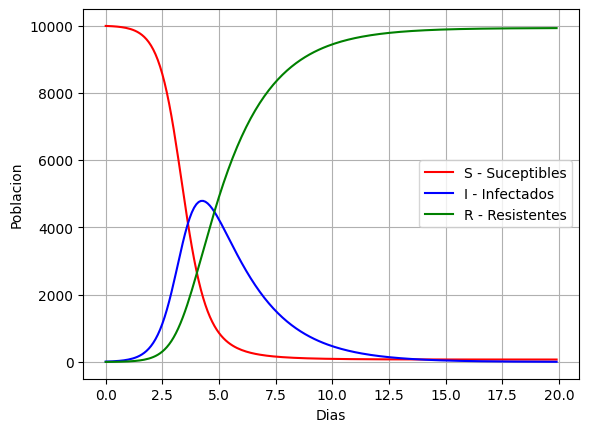

In [7]:
# Definiendo los vectores nulos para almacenar los datos de cada poblacion
s1 = np.zeros(len(t))
i1 = np.zeros(len(t))
r1 = np.zeros(len(t))


# Estableciendo los valores iniciales en las listas que contendran el coportamiento
# de cada poblacion
s1[0] = S0  
i1[0] = I0
r1[0] = R0


# Usando el metodo de AEuler para determinar el segundo valor y de esta forma poder
# aplicar el metodo de Adams 
s1[1] = s1[0] + dt * Fs(s1[0], i1[0])
i1[1] = i1[0] + dt * Fi(s1[0], i1[0])
r1[1] = r1[0] + dt * Fr(s1[0], i1[0])


#Usando el metodo de Adams
for i in range(1, len(t) - 1):
  s1[i+1] = s1[i] + (dt/2) * (3 * Fs(s1[i], i1[i]) - Fs(s1[i-1], i1[i-1]))
  i1[i+1] = i1[i] + (dt/2) * (3 * Fi(s1[i], i1[i]) - Fi(s1[i-1], i1[i-1])) 
  r1[i+1] = r1[i] + (dt/2) * (3 * Fr(s1[i], i1[i]) - Fr(s1[i-1], i1[i-1])) 

     
# Generando las graficas de comportamiento de cada poblacion
plt.plot(t, s1, '-r', label ='S - Suceptibles')
plt.plot(t, i1, '-b', label ='I - Infectados')
plt.plot(t, r1, '-g', label ='R - Resistentes')
plt.xlabel('Dias')
plt.ylabel('Poblacion')
plt.grid()
plt.legend()
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()


  El pico de la epidemia, se dio cuado 4788 personas se encontraron contagiadas, esto
  ocurrio en el dia 4.3.



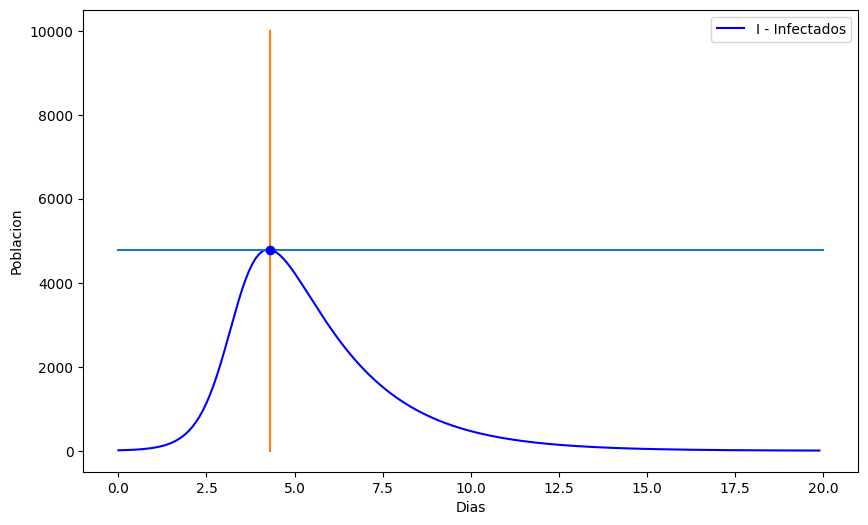

In [8]:
# Determinando mediante un ciclo en que dia se presenta el maximo de infectados
diaPicoPandemia = 0

for i in range(0, len(i1) - 1):
  if i1[i] == max(i1):
    diaPicoPandemia = t[i]
    break

# Impresion del resultado
print(f"""
  El pico de la epidemia, se dio cuado {round(max(i1))} personas se encontraron contagiadas, esto
  ocurrio en el dia {diaPicoPandemia}.
""")

# Generacion de la gafica para mostrar el punto donde se da el maximo de infectados
plt.plot(t, i1, '-b', label ='I - Infectados')
plt.plot([t0, tf], [max(i1), max(i1)])
plt.plot([diaPicoPandemia, diaPicoPandemia], [0, N])
plt.plot([diaPicoPandemia], [max(i1)], "ob")
plt.xlabel('Dias')
plt.ylabel('Poblacion')
plt.legend()
plt.show()


  El dia en el que poco mas del 90% de la poblacion se encuentra recuperada de la enfermedad
  se da a los 8.7 dias.



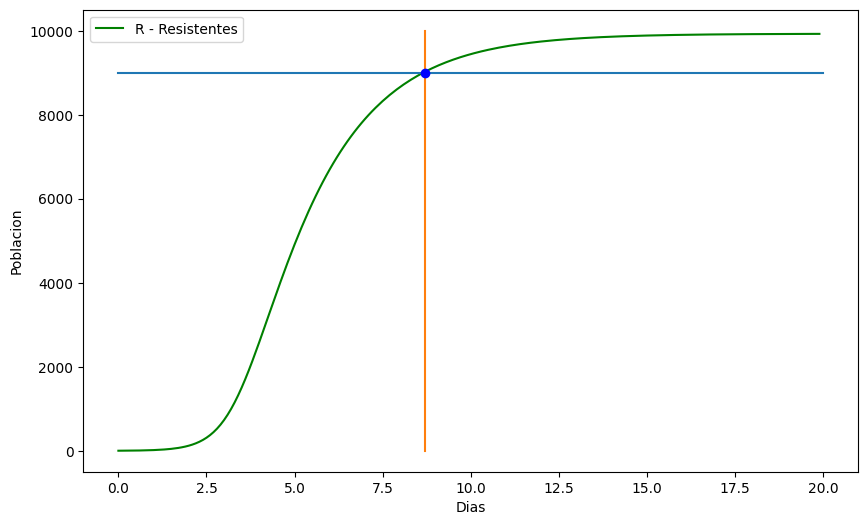

In [9]:
# Determinando mediante un ciclo en que dia se presenta el 90% de la poblacion
# recuperada
diaRecuperados90 = 0
valorDePoblacion90 = N * 90 / 100 # Calculo de cuanto es el 90% de la poblacion

for i in range(0, len(r1) - 1):
  if r1[i] >= valorDePoblacion90: # Determinando cuando el 90% de la poblacion esta recuperada
    diaRecuperados90 = t[i]
    break

# Impresion del resultado
print(f"""
  El dia en el que poco mas del 90% de la poblacion se encuentra recuperada de la enfermedad
  se da a los {round(diaRecuperados90, 2)} dias.
""")

# Generacion de la gafica para mostrar el punto donde se da el 90% de recuperados
plt.plot(t, r1, '-g', label ='R - Resistentes')
plt.plot([t0, tf], [valorDePoblacion90, valorDePoblacion90])
plt.plot([diaRecuperados90, diaRecuperados90], [0, N])
plt.plot([diaRecuperados90], [valorDePoblacion90], "ob")
plt.xlabel('Dias')
plt.ylabel('Poblacion')
plt.legend()
plt.show()

- Podría ajustar este modelo para modelar el comportamiento del corona virus? 

Como se encuentra actualmente definido el modelo no se podria utilizar para modelar el comportamiento del coronavirus.

Sin enmbargo se puede ajustar modificando los parametros iniciales a los correspondientes al covid, y agregando una nueva ecuacion diferencial que tenga en cuenta los fallecimientos dados por el covid y si se quiere modelar a largo plazo tambien una que tenga en cuenta los nacimientos.